## Preprocessing

In [25]:
# variables that are dropped
from helper_functions import format_variables, read_data

data_df = read_data()

to_filter = ["id", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "terminal"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

/Users/aymanehachcham/miniconda3/envs/case_s1/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [26]:
data_df

,zeit,bundesland,befinden,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,age
0,2006-10-25 15:03:29,Steiermark,2,f,False,False,False,False,120.0,80.0,123.0,86.0,42
1,2006-08-28 17:04:07,Steiermark,1,f,False,False,False,False,150.0,80.0,162.0,86.0,53
2,2006-06-04 14:31:14,Steiermark,2,m,False,False,False,False,135.0,70.0,121.0,66.0,46
3,2006-10-13 14:50:56,Steiermark,5,f,False,True,True,False,120.0,80.0,122.0,70.0,34
4,2006-08-12 16:54:45,Steiermark,1,f,False,False,True,False,110.0,80.0,110.0,75.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,2006-05-11 12:02:18,Steiermark,2,m,False,False,True,False,150.0,60.0,116.0,80.0,52
14827,2006-07-11 15:09:36,Steiermark,1,m,False,True,True,True,120.0,80.0,138.0,84.0,55
14828,2006-09-28 10:59:45,Steiermark,2,f,False,True,True,True,140.0,85.0,116.0,62.0,61
14829,2006-04-30 13:29:15,Steiermark,1,m,False,False,False,False,120.0,70.0,113.0,88.0,44


In [27]:
# Categorical features
cat_feat_list

['bundesland',
 'befinden',
 'geschlecht',
 'raucher',
 'blutzucker_bekannt',
 'cholesterin_bekannt',
 'in_behandlung']

In [31]:
import pandas as pd
# Transform zeit to pandas datetime format:
data_df["zeit"] = pd.to_datetime(data_df["zeit"])

# Extract the month and the hour from the zeit variable:
data_df["month"] = data_df["zeit"].dt.month
data_df["hour"] = data_df["zeit"].dt.hour

data_df

,zeit,bundesland,befinden,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,age,month,hour
0,2006-10-25 15:03:29,Steiermark,2,f,False,False,False,False,120.0,80.0,123.0,86.0,42,10,15
1,2006-08-28 17:04:07,Steiermark,1,f,False,False,False,False,150.0,80.0,162.0,86.0,53,8,17
2,2006-06-04 14:31:14,Steiermark,2,m,False,False,False,False,135.0,70.0,121.0,66.0,46,6,14
3,2006-10-13 14:50:56,Steiermark,5,f,False,True,True,False,120.0,80.0,122.0,70.0,34,10,14
4,2006-08-12 16:54:45,Steiermark,1,f,False,False,True,False,110.0,80.0,110.0,75.0,40,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,2006-05-11 12:02:18,Steiermark,2,m,False,False,True,False,150.0,60.0,116.0,80.0,52,5,12
14827,2006-07-11 15:09:36,Steiermark,1,m,False,True,True,True,120.0,80.0,138.0,84.0,55,7,15
14828,2006-09-28 10:59:45,Steiermark,2,f,False,True,True,True,140.0,85.0,116.0,62.0,61,9,10
14829,2006-04-30 13:29:15,Steiermark,1,m,False,False,False,False,120.0,70.0,113.0,88.0,44,4,13


<Axes: xlabel='month', ylabel='messwert_bp_sys'>

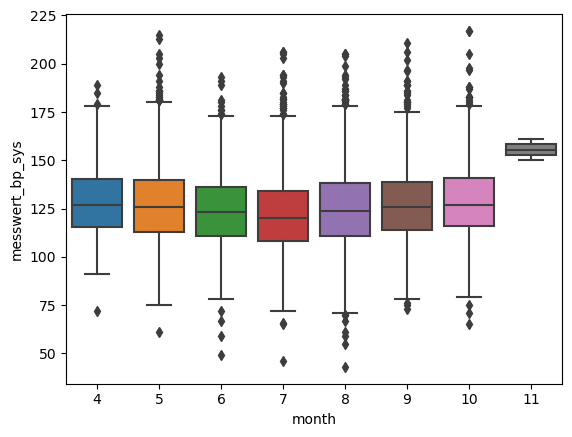

In [6]:
# Check the relationship between month and messwert_bp_sys:
import seaborn as sns

sns.boxplot(x="month", y="messwert_bp_sys", data=data_df)

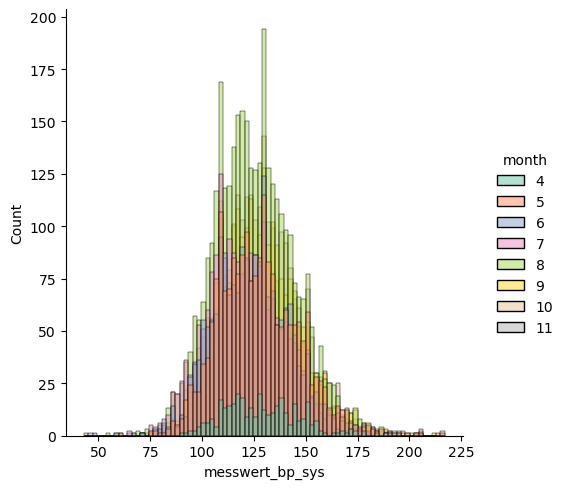

In [13]:
# change the hue color for the plot:
sns.displot(data_df, x="messwert_bp_sys", hue="month", kind="hist", fill=True, palette="Set2")

In [37]:
# For each month give the messwert_bp_sys values that are the mode, median, and mean:
data_df.groupby("month")["messwert_bp_sys"].agg([pd.Series.mode, "mean", "median"])

,mode,mean,median
month,,,
4,139.0,128.554572,127.0
5,116.0,127.147405,126.0
6,130.0,123.822199,123.0
7,113.0,121.587740,120.0
8,120.0,125.080692,124.0
9,124.0,127.007497,126.0
10,122.0,128.639134,127.0
11,"[150.0, 161.0]",155.500000,155.5


/Users/aymanehachcham/miniconda3/envs/case_s1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='messwert_bp_sys', ylabel='month'>

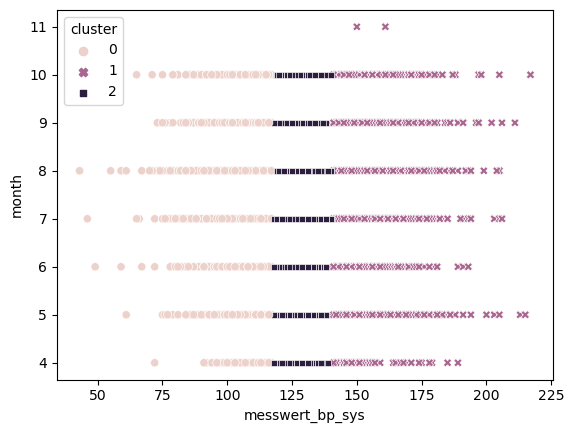

In [24]:
# Perform a cluster analysis on the messwert_bp_sys variable with respect to the month:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_df[["messwert_bp_sys", "month"]])
data_df["cluster"] = kmeans.labels_

# Plot the clusters using color and shape:
sns.scatterplot(data=data_df, x="messwert_bp_sys", y="month", hue="cluster", style="cluster")

## Perform the same analysis as above for the hour variable:

<Axes: xlabel='hour', ylabel='messwert_bp_sys'>

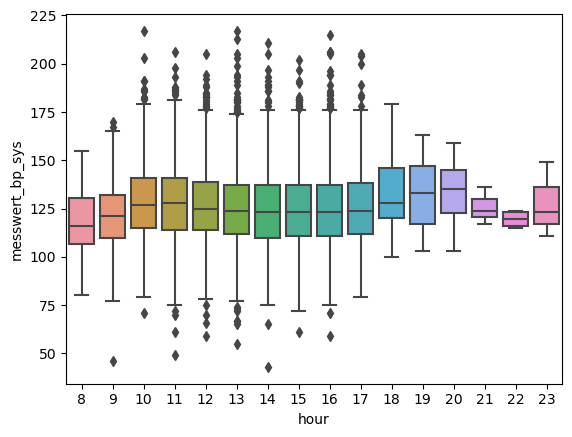

In [32]:
# Check the relationship between hour and messwert_bp_sys:
sns.boxplot(x="hour", y="messwert_bp_sys", data=data_df)


In [36]:
# For each hour give the mode, mean and median of the messwert_bp_sys variable:
data_df.groupby("hour")["messwert_bp_sys"].agg([pd.Series.mode, "mean", "median"])

,mode,mean,median
hour,,,
8,131.0,117.666667,116.0
9,120.0,121.458204,121.0
10,"[122.0, 130.0]",128.415816,127.0
11,120.0,127.992908,128.0
12,118.0,126.635448,125.0
13,121.0,124.954693,124.0
14,122.0,123.808024,123.0
15,122.0,124.697868,123.0
16,"[116.0, 120.0]",124.713483,123.0


/Users/aymanehachcham/miniconda3/envs/case_s1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='messwert_bp_sys', ylabel='hour'>

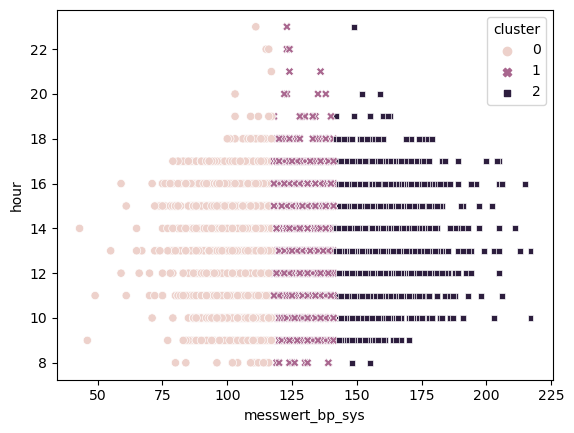

In [38]:
# Perform a cluster analysis on the messwert_bp_sys variable with respect to the hour:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_df[["messwert_bp_sys", "hour"]])
data_df["cluster"] = kmeans.labels_

# Plot the clusters using color and shape:
sns.scatterplot(data=data_df, x="messwert_bp_sys", y="hour", hue="cluster", style="cluster")

## Check the influence of the month and hour on the LM Model

In [39]:
# First, check if the variables month and hour have a statistical effect on the messwert_bp_sys variable:
import statsmodels.api as sm

X = data_df[["month", "hour"]]
y = data_df["messwert_bp_sys"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     24.27
Date:                Sat, 13 May 2023   Prob (F-statistic):           3.01e-11
Time:                        15:17:52   Log-Likelihood:                -64873.
No. Observations:               14831   AIC:                         1.298e+05
Df Residuals:                   14828   BIC:                         1.298e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.3292      1.199    105.376      0.000     123.979     128.679
month          0.4772      0.092      5.186      0.000       0.297       0.658
hour          -0.3174      0.070     -4.515      0.000      -0.455      -0.180
==============================================================================
Omnibus:                      358.936   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.198
Skew:                           0.349   Prob(JB):                     3.79e-89
Kurtosis:                       3.414   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Perform an ANOVA test to check if the month variable has a statistical effect on the messwert_bp_sys variable:
import statsmodels.formula.api as smf

model = smf.ols(formula="messwert_bp_sys ~ C(month)", data=data_df).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(month),7.879505e+04,7.0,30.842111,1.031009e-42
Residual,5.409946e+06,14823.0,NaN,NaN
